In [1]:
from lighter.utils.runner import parse_config
import os
from monai.visualize import blend_images
import matplotlib.pyplot as plt
import numpy as np
import torch
from utils import plot_3d_image


# Change directory to the experiment folder
os.chdir("/home/suraj/Repositories/lighter-ct-fm")

In [2]:
kwargs = {
    "config_file": ["experiments/ssl/base.yaml", "experiments/ssl/pretrain_method/simclr.yaml"],
}
parser = parse_config(**kwargs)

2024/02/29 16:24:38.523  |  ℹ️  INFO      |  /home/suraj/Repositories/lighter-ct-fm imported   ]8;id=837554;file:///home/suraj/Repositories/lighter/lighter/utils/dynamic_imports.py\dynamic_imports.py]8;;\:]8;id=573936;file:///home/suraj/Repositories/lighter/lighter/utils/dynamic_imports.py#76\76]8;;\
as 'project' module.                                                                                               

In [3]:

def dataset_item_generator(item):
    if isinstance(item, list) or isinstance(item, tuple):
        for sub_item in item:
            if sub_item is None:
                continue
            elif isinstance(sub_item, list) or isinstance(sub_item, tuple):
                yield from dataset_item_generator(sub_item)
            else:
                yield sub_item
    else:
        yield item

        


In [4]:
train_dataset = parser.get_parsed_content("system#datasets#train")


2024/02/29 16:24:41.721  |  ⚠️  WARNING   |  monai.transforms.croppad.array                    ]8;id=83224;file:///home/suraj/miniconda3/envs/lighter_dev/lib/python3.8/site-packages/monai/utils/deprecate_utils.py\deprecate_utils.py]8;;\:]8;id=352573;file:///home/suraj/miniconda3/envs/lighter_dev/lib/python3.8/site-packages/monai/utils/deprecate_utils.py#38\38]8;;\
CropForeground.__init__:allow_smaller: Current default value of argument `allow_smaller=True`                      
has been deprecated since version 1.2. It will be changed to `allow_smaller=False` in version                      
1.5.                                                                                                               

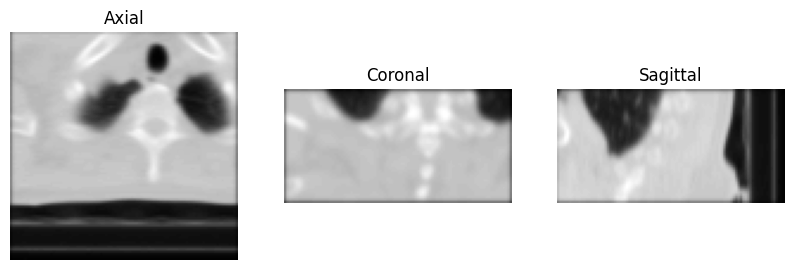

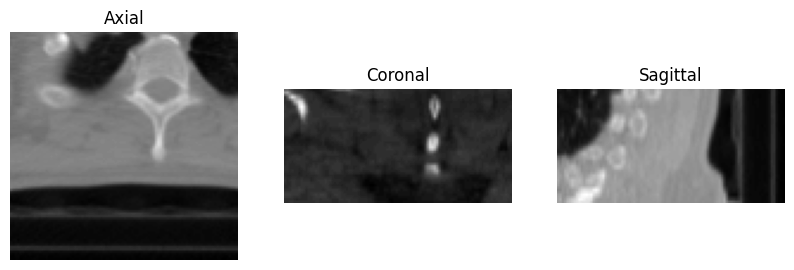

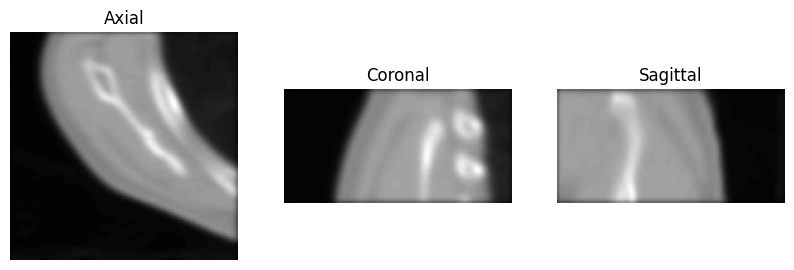

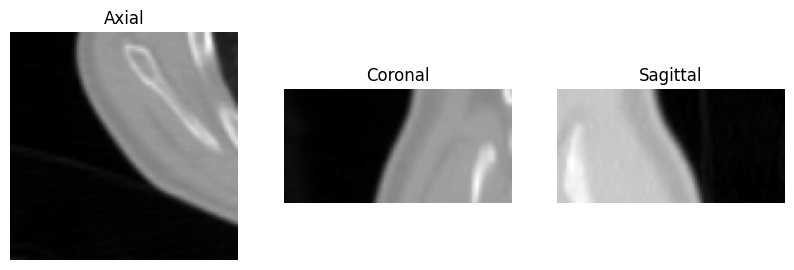

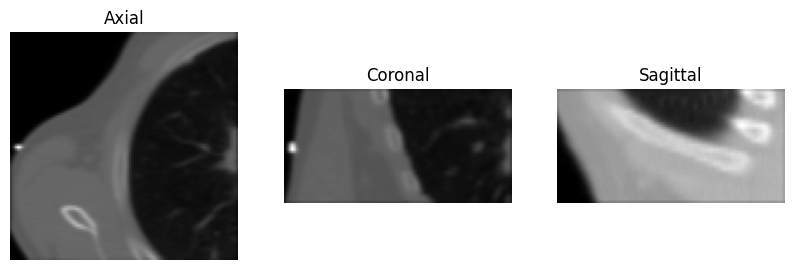

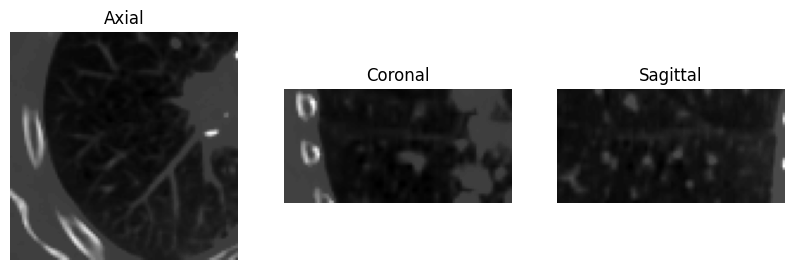

In [5]:
dataset_idx = 0
train_dataset = parser.get_parsed_content("system#datasets#train")
dataset_item = train_dataset[dataset_idx]

# Recursively get the first valid item
g = dataset_item_generator(dataset_item)            

for item in g:
    if isinstance(item, dict):
        for k, v in item.items():
            if isinstance(v, torch.Tensor):
                print(k, v.shape)
                if len(v.shape) == 4:
                    plot_3d_image(v, cmap="gray")
                else:
                    plt.imshow(v[0])
                    plt.show()
            else:
                print(v)
    elif isinstance(item, torch.Tensor):
        if len(item.shape) == 4:

            item = (item * 255).to(torch.uint8)
            plot_3d_image(item, cmap="gray")
        else:
            plt.imshow(item[0])
            plt.show()
        

In [6]:
dataloaders = torch.utils.data.DataLoader(train_dataset, batch_size=2, shuffle=True, num_workers=4)

In [7]:
dataiter = iter(dataloaders)
item = next(dataiter)


In [10]:
item[0][0][0].shape

torch.Size([2, 1, 48, 96, 96])

In [ ]:
from itkwidgets import view

view(image=item['input'].squeeze())

Viewer(geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itk.itkImagePython.itkImageF3; pro…

In [ ]:
[torch.abs(item['input'].affine[i, i]) for i in range(3)]


[tensor(0.9766, dtype=torch.float64),
 tensor(0.9766, dtype=torch.float64),
 tensor(3., dtype=torch.float64)]

In [ ]:
item['grid'][0, 0, 0]


╭─────────────────────────────────────── Traceback (most recent call last) ───────────────────────────────────────╮
│ in <module>:1                                                                                                   │
│                                                                                                                 │
│ ❱ 1 item['grid'][0, 0, 0]                                                                                       │
│   2                                                                                                             │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯
KeyError: 'grid'

In [ ]:
image, label = item["input"], item["target"]

if image.shape != label.shape:
    raise ValueError(f"Image and label shape mismatch: {image.shape} {label.shape}")

print(f"Image shape: {image.shape}")
print(f"Label shape: {label.shape}")

ret = blend_images(image=image, label=label, alpha=0.3, cmap="hsv")
plot_3d_image(ret)

Image shape: torch.Size([1, 100, 280, 280])
Label shape: torch.Size([1, 100, 280, 280])


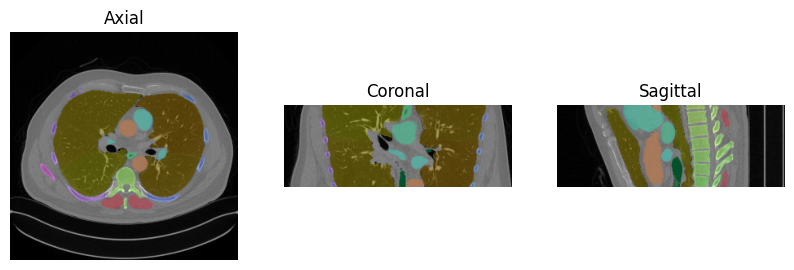

In [ ]:

dataset_idx = 2
val_dataset = parser.get_parsed_content("system#datasets#val")
item = val_dataset[dataset_idx]
image, label = item["input"], item["target"]

if image.shape != label.shape:
    raise ValueError(f"Image and label shape mismatch: {image.shape} {label.shape}")

print(f"Image shape: {image.shape}")
print(f"Label shape: {label.shape}")

ret = blend_images(image=image, label=label, alpha=0.3, cmap="hsv")
plot_3d_image(ret)